## Phase 1: Data Exploration & Initial Assessment

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("batting.csv")
df

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


### UNDERSTAND THE DATA

In [4]:
df.shape

(1628, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MatchID            1628 non-null   int64  
 1   InningsNo          1628 non-null   int64  
 2   Team               1628 non-null   object 
 3   PlayerName         1628 non-null   object 
 4   MatchPlayingOrder  1628 non-null   int64  
 5   BowlerName         912 non-null    object 
 6   OutDesc            1176 non-null   object 
 7   Runs               1628 non-null   int64  
 8   Balls              1628 non-null   int64  
 9   DotBalls           1628 non-null   int64  
 10  Ones               1628 non-null   int64  
 11  Twos               1628 non-null   int64  
 12  Threes             1628 non-null   int64  
 13  Fours              1628 non-null   int64  
 14  Sixes              1628 non-null   int64  
 15  StrikeRate         1628 non-null   object 
 16  WicketNo           911 n

### Previewing the first 5 rows

In [6]:
df.head()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14


### Observation:
 - The preview shows the first 5 rows of the data and helps us check if the file loaded correctly

### Previewing the last 5 rows

In [7]:
df.tail()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1627,76,2,GT,Yash Dayal,11,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


### Observation:
 - The preview shows the last 5 rows of the data and helps us check if the file loaded correctly

In [8]:
df.describe()

,MatchID,InningsNo,MatchPlayingOrder,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,WicketNo,AgainstFast,AgainstSpin
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,911.000000,1628.000000,1628.000000
mean,37.608108,1.500000,6.000000,14.159705,10.571253,4.093980,3.921376,0.627150,0.035627,1.238943,0.652334,4.472009,6.824324,3.702703
std,21.547791,0.500154,3.163249,20.275401,13.142609,4.778989,5.697342,1.153994,0.201307,2.058166,1.272667,2.863763,8.534458,5.950012
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,19.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,37.500000,1.500000,6.000000,5.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000
75%,56.000000,2.000000,9.000000,22.000000,16.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,6.000000,11.000000,5.000000
max,76.000000,2.000000,11.000000,140.000000,70.000000,28.000000,32.000000,10.000000,2.000000,13.000000,10.000000,11.000000,57.000000,30.000000


### Observation:
 - Describe shows the summary stats

In [9]:
df.dtypes

MatchID                int64
InningsNo              int64
Team                  object
PlayerName            object
MatchPlayingOrder      int64
BowlerName            object
OutDesc               object
Runs                   int64
Balls                  int64
DotBalls               int64
Ones                   int64
Twos                   int64
Threes                 int64
Fours                  int64
Sixes                  int64
StrikeRate            object
WicketNo             float64
AgainstFast            int64
AgainstSpin            int64
dtype: object

## Phase 2: Data Cleaning & Manipulation

### Handle missing values

In [10]:
df.isnull()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1624,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1625,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
1626,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False


In [11]:
df.isnull().sum()

MatchID                0
InningsNo              0
Team                   0
PlayerName             0
MatchPlayingOrder      0
BowlerName           716
OutDesc              452
Runs                   0
Balls                  0
DotBalls               0
Ones                   0
Twos                   0
Threes                 0
Fours                  0
Sixes                  0
StrikeRate             0
WicketNo             717
AgainstFast            0
AgainstSpin            0
dtype: int64

### Handle Duplicates

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1623    False
1624    False
1625    False
1626    False
1627    False
Length: 1628, dtype: bool

In [15]:
df.duplicated().sum()

np.int64(0)

### Observation:
 - There are no duplicates

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(1628, 19)

### Observation:
 - In cricket data set we droped all the duplicates

### Convert numeric strings to numbers (if any)

In [19]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Runs'] 

0        0
1        3
2       28
3       15
4       26
        ..
1623     0
1624     0
1625     0
1626     0
1627     0
Name: Runs, Length: 1628, dtype: int64

In [20]:
df['PlayerName'] = df['PlayerName'].astype('category')
df['PlayerName'] 

0       Ruturaj  Gaikwad
1           Devon Conway
2          Robin Uthappa
3          Ambati Rayudu
4        Ravindra Jadeja
              ...       
1623         Rashid Khan
1624         Sai Kishore
1625      Mohammad Shami
1626     Lockie Ferguson
1627          Yash Dayal
Name: PlayerName, Length: 1628, dtype: category
Categories (190, object): ['Aaron Finch', 'Abdul Samad', 'Abhijeet Tomar', 'Abhinav Manohar', ..., 'Wriddhiman Saha', 'Yash Dayal', 'Yashasvi Jaiswal', 'Yuzvendra Chahal']

### Observation:
 - All columns now have appropriate data types

### Non-Visual Bivariate Analysis

In [64]:
pd.crosstab(df['Team'], df['PlayerName'])

PlayerName,Aaron Finch,Abdul Samad,Abhijeet Tomar,Abhinav Manohar,Abhishek Sharma,Adam Milne,Aiden Markram,Ajinkya Rahane,Akash Deep,Alzarri Joseph,...,Varun Chakaravarthy,Venkatesh Iyer,Vijay Shankar,Virat Kohli,Wanindu Hasaranga,Washington Sundar,Wriddhiman Saha,Yash Dayal,Yashasvi Jaiswal,Yuzvendra Chahal
Team,,,,,,,,,,,,,,,,,,,,,
CSK,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GT,0,0,0,8,0,0,0,0,0,9,...,0,0,4,0,0,0,11,9,0,0
KKR,5,0,1,0,0,0,0,7,0,0,...,11,12,0,0,0,0,0,0,0,0
LSG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PBSK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RCB,0,0,0,0,0,0,0,0,5,0,...,0,0,0,16,16,0,0,0,0,0
RR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,17


### Observation:
 - Some teams have more experienced players

In [128]:
df.pivot_table(index='PlayerName',columns='BowlerName',values=['WicketNo','StrikeRate'],aggfunc={'WicketNo':'mean','StrikeRate':'sum'})

C:\Users\sai03\AppData\Local\Temp\ipykernel_12308\2497988706.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='PlayerName',columns='BowlerName',values=['WicketNo','StrikeRate'],aggfunc={'WicketNo':'mean','StrikeRate':'sum'})


StrikeRate                                          \
BowlerName        Aiden Markram Akash Deep Alzarri Joseph Andre Russell   
PlayerName                                                                
Aaron Finch                   0          0              0             0   
Abdul Samad                   0          0              0             0   
Abhijeet Tomar                0          0              0             0   
Abhinav Manohar               0          0              0         50.00   
Abhishek Sharma               0          0         154.76             0   
...                         ...        ...            ...           ...   
Washington Sundar             0          0          75.00         44.44   
Wriddhiman Saha               0          0              0             0   
Yash Dayal                    0          0              0          0.00   
Yashasvi Jaiswal              0          0              0             0   
Yuzvendra Chahal              0          0              0             0   

                                                                      \
BowlerName        Andrew Tye Anrich Nortje Anukul Roy Arshdeep Singh   
PlayerName                                                             
Aaron Finch                0             0          0              0   
Abdul Samad                0             0          0              0   
Abhijeet Tomar             0             0          0              0   
Abhinav Manohar            0             0          0              0   
Abhishek Sharma            0             0          0              0   
...                      ...           ...        ...            ...   
Washington Sundar          0             0          0              0   
Wriddhiman Saha            0             0          0              0   
Yash Dayal                 0             0          0              0   
Yashasvi Jaiswal           0             0          0         165.85   
Yuzvendra Chahal           0             0          0              0   

                                         ...    WicketNo              \
BowlerName        Avesh Khan Axar Patel  ... Umesh Yadav Umran Malik   
PlayerName                               ...                           
Aaron Finch                0          0  ...         NaN         NaN   
Abdul Samad             0.00          0  ...         NaN         NaN   
Abhijeet Tomar             0          0  ...         NaN         NaN   
Abhinav Manohar            0          0  ...         NaN        10.0   
Abhishek Sharma       118.18          0  ...         NaN         NaN   
...                      ...        ...  ...         ...         ...   
Washington Sundar          0          0  ...         NaN         NaN   
Wriddhiman Saha            0          0  ...         9.0         5.0   
Yash Dayal                 0          0  ...         NaN         NaN   
Yashasvi Jaiswal           0          0  ...         NaN         NaN   
Yuzvendra Chahal           0          0  ...         NaN         NaN   

                                                                               \
BowlerName        Vaibhav Arora Varun Aaron Varun Chakaravarthy Vijay Shankar   
PlayerName                                                                      
Aaron Finch                 NaN         NaN                 NaN           NaN   
Abdul Samad                 NaN         NaN                 NaN           NaN   
Abhijeet Tomar              NaN         NaN                 NaN           NaN   
Abhinav Manohar             NaN         NaN                 NaN           NaN   
Abhishek Sharma             NaN         NaN                 1.0           NaN   
...                         ...         ...                 ...           ...   
Washington Sundar           NaN         NaN                 NaN           NaN   
Wriddhiman Saha             NaN         NaN                 NaN           NaN   
Yash Dayal                  NaN         NaN                 N

In [66]:
df.groupby('Team')['Runs'].mean().sort_values(ascending=False)

Team
RR      15.010695
LSG     14.575758
DC      14.402597
GT      14.301136
PBSK    14.240260
CSK     14.058442
RCB     13.943182
KKR     13.694805
MI      13.636364
SRH     13.532468
Name: Runs, dtype: float64

### Observation:
 - Certain teams consistently score higher averages

In [69]:
df = df[['Balls','Runs']].corr()
df

,Balls,Runs
Balls,1.000000,0.949404
Runs,0.949404,1.000000


### Observation:
 - Positive correlation: more balls → more runs

### Final Data Validation

In [70]:
df.isnull().sum()

Balls    0
Runs     0
dtype: int64

### Observation:
 - No missing values
 - Dataset is clean and consistent

### Select Numerical Columns

In [71]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Balls', 'Runs'], dtype='object')

### IQR & Outlier Insight

In [21]:
Q1 = df['Runs'].quantile(0.25)
Q3 = df['Runs'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(22.0)

### Non-Visual Bivariate Insight (Correlation)

In [25]:
df[['Runs','DotBalls']].corr()
df

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,Yuzvendra Chahal,not out,26,28,8,18,1,0,0,1,92.86,4.0,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,Yuzvendra Chahal,not out,0,0,0,0,0,0,0,0,-,4.0,0,0
1624,76,2,GT,Sai Kishore,8,Yuzvendra Chahal,not out,0,0,0,0,0,0,0,0,-,4.0,0,0
1625,76,2,GT,Mohammad Shami,9,Yuzvendra Chahal,not out,0,0,0,0,0,0,0,0,-,4.0,0,0
1626,76,2,GT,Lockie Ferguson,10,Yuzvendra Chahal,not out,0,0,0,0,0,0,0,0,-,4.0,0,0


### Calculate Q1, Q3 and IQR (IQ Values)

In [72]:
iqr_values = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = {"Q!":Q1,"Q3":Q3,"IQR":IQR}
iqr_df = pd.DataFrame(iqr_values).T
iqr_df

,Q!,Q3,IQR
Balls,0.962053,0.987351,0.025298
Runs,0.962053,0.987351,0.025298


### Detect Outliers Using IQR Method

In [76]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)].shape[1]
outliers

{'Balls': 2, 'Runs': 2}

### Observation:
 - Runs & Highest Score have many outliers
 - These represent top-performing players

### Data Visualization

### Univariate Analysis

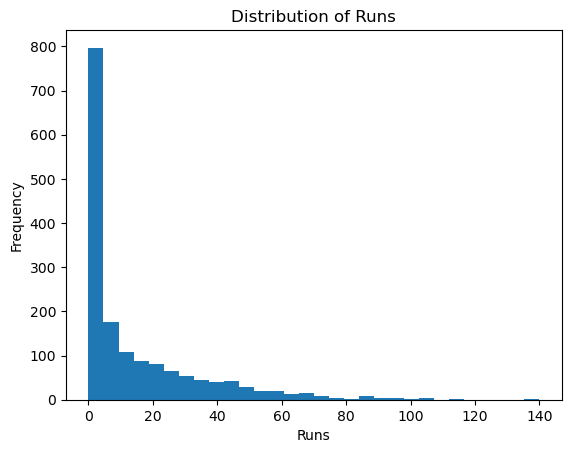

In [87]:
plt.hist(df['Runs'], bins=30)
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.title("Distribution of Runs")
plt.show()

### Observation:
 - Most players score low to medium runs
 - Very few players score extremely high runs
 - Distribution is right-skewed

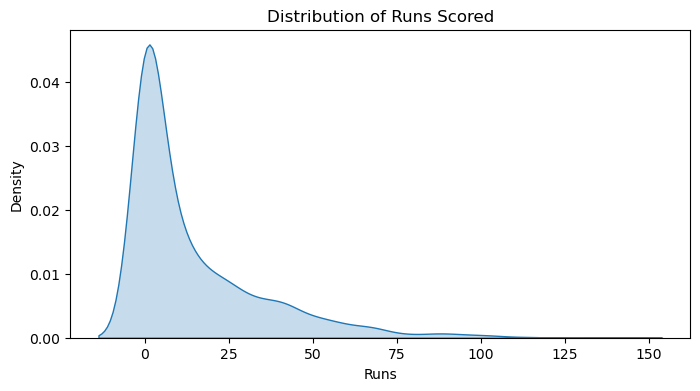

In [62]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['Runs'], fill=True)
plt.title("Distribution of Runs Scored")
plt.show()

### Observation:
 - Most runs lie in a narrow range
 - Extreme values indicate highly consistent batsmen

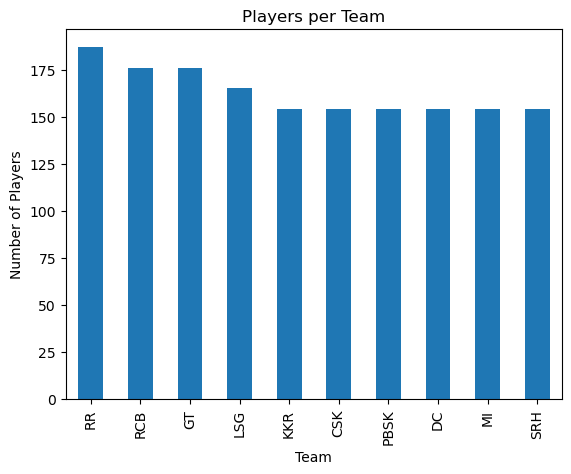

In [89]:
df['Team'].value_counts().plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.title("Players per Team")
plt.show()

### Observation:
 - Some teams have more active players
 - Others rely on fewer key batsmen

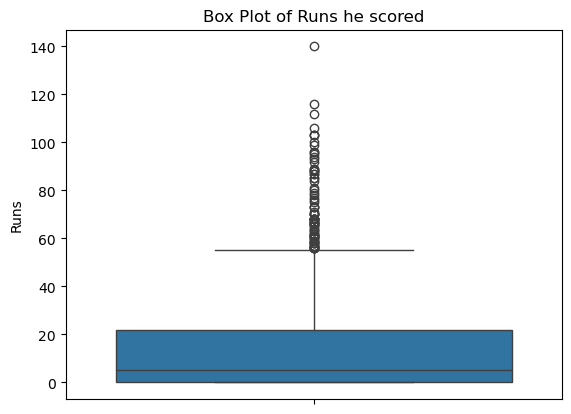

In [96]:
sns.boxplot(y=df['Runs'])
plt.title("Box Plot of Runs he scored")
plt.show()

### Observation:
 - Several outliers exist
 - These represent experienced senior players
 - Outliers are domain-valid

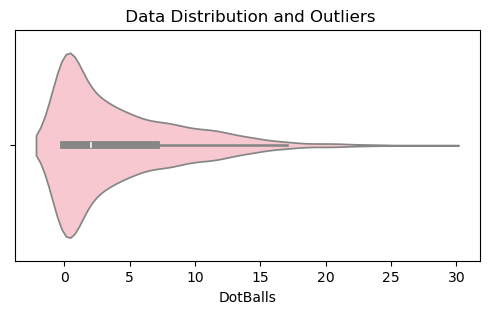

In [85]:
plt.figure(figsize=(6,3))
sns.violinplot(x=df['DotBalls'],color='pink')
plt.title(" Data Distribution and Outliers")
plt.show()

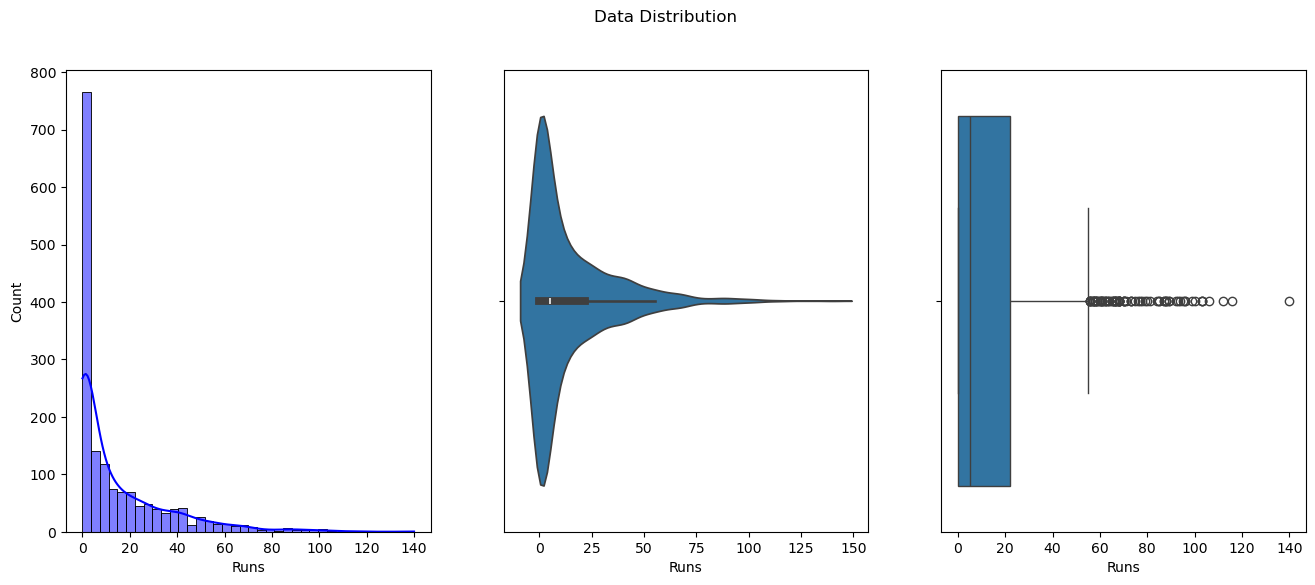

In [134]:
plt.figure(figsize=(16,6))
plt.suptitle("Data Distribution")

plt.subplot(1,3,1)
sns.histplot(df['Runs'],kde=True,color='blue')

plt.subplot(1,3,2)
sns.violinplot(x=df['Runs'])

plt.subplot(1,3,3)
sns.boxplot(x=df['Runs'])
plt.show()

### Observation:
 - We can observe that profitability has high variation.

### Bivariate Analysis

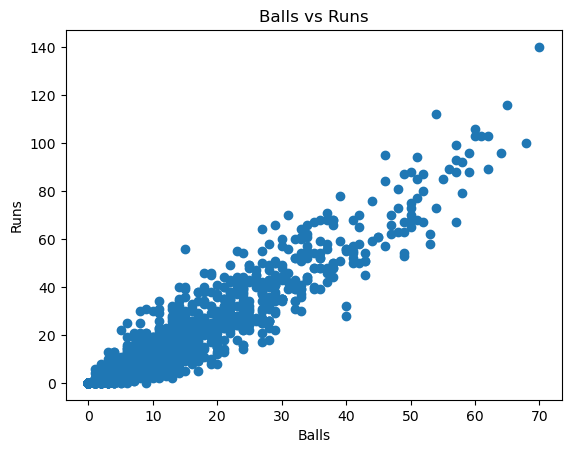

In [98]:
plt.scatter(df['Balls'], df['Runs'])
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.title("Balls vs Runs")
plt.show()

### Observation:
 - Positive trend: more balls → more runs
 - Relationship is strong but not perfectly linear

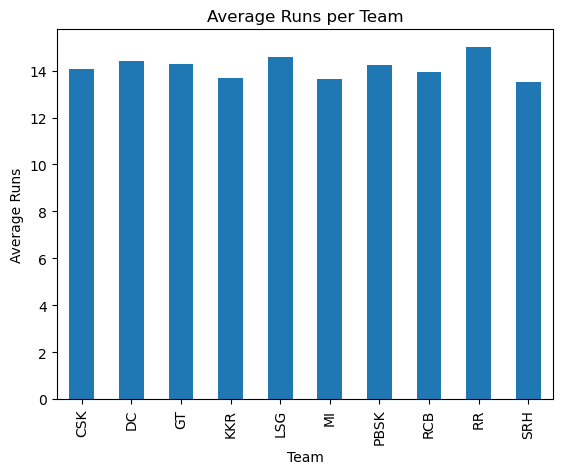

In [99]:
df.groupby('Team')['Runs'].mean().plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Average Runs")
plt.title("Average Runs per Team")
plt.show()

### Observation:
 - Certain teams consistently produce higher average scorers

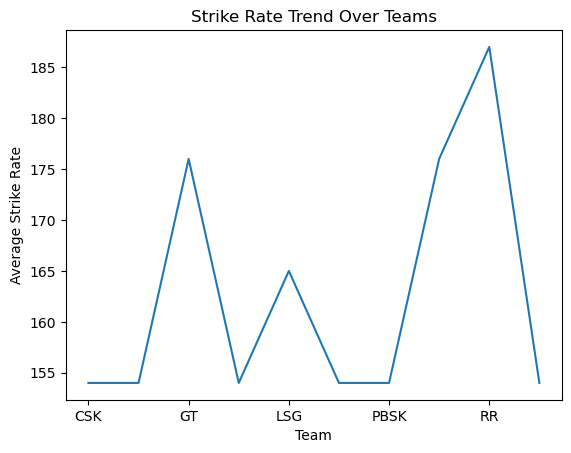

In [103]:
df.groupby('Team')['StrikeRate'].count().plot()
plt.xlabel("Team")
plt.ylabel("Average Strike Rate")
plt.title("Strike Rate Trend Over Teams")
plt.show()

### Observation:
 - Strike rate generally increases over teams

### Multivariate Analysis

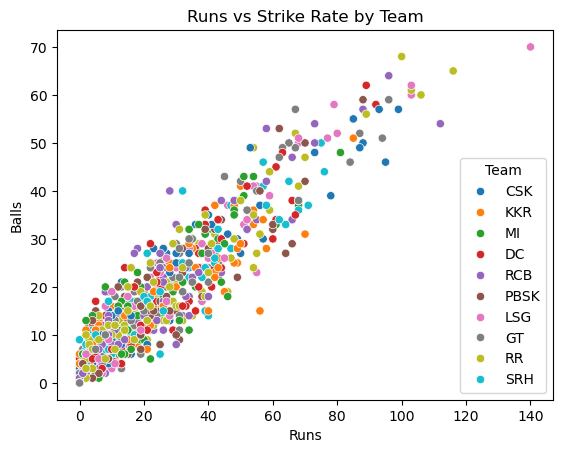

In [119]:
sns.scatterplot(x='Runs',y='Balls',hue='Team',data=df)
plt.title("Runs vs Balls by Team")
plt.show()

### Observation:
 - Some teams cluster in high runs & high strike rate
 - Others show conservative batting styles

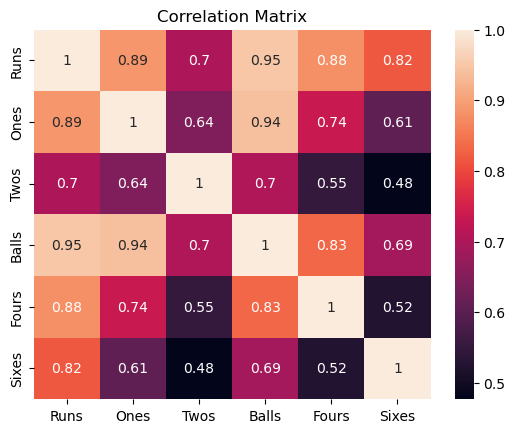

In [122]:
corr = df[['Runs','Ones','Twos','Balls','Fours','Sixes']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

### Observation:
 - Strong correlation between:
 - Runs & Ones
 - Runs & Fours

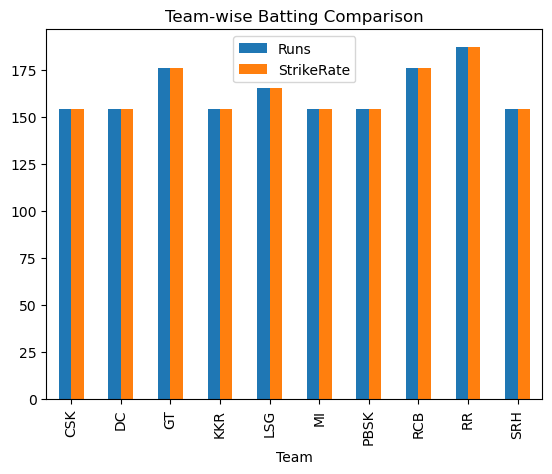

In [125]:
pivot = df.pivot_table(index='Team',values=['Runs','StrikeRate'],aggfunc='count')
pivot.plot(kind='bar')
plt.title("Team-wise Batting Comparison")
plt.show()

### Observation:
 - Teams differ in scoring consistency and aggression

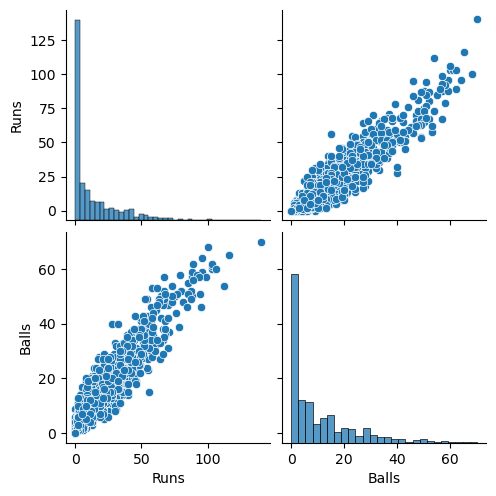

In [133]:
sns.pairplot(df[['Team','Runs','Balls','StrikeRate']])
plt.show()

### Observation:
 - Confirms trends observed in scatter and correlation plots
 - No abnormal relationships detected

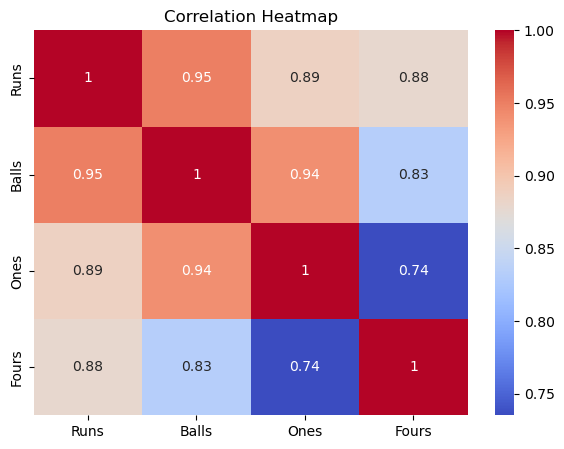

In [131]:
plt.figure(figsize=(7,5))
corr = df[['Runs','Balls','Ones','Fours']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observation:
 - Balls strongly correlate with runs
 - Fours has weaker correlation with runs
 - Ones is moderately correlated with runs